In [1]:
"""
Python 3.10 Best models Spaceship_Titanic program will you survive on the spaceship titanic or not
File name Titanic_eda.py

Version: 0.1
Author: MLCV
Date: 2023-06-25
"""

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

#load packages
import sys #access to system parameters https://docs.python.org/3/library/sys.html
print("Python version: {}". format(sys.version))

import pandas as pd #collection of functions for data processing and analysis modeled after R dataframes with SQL like features
print("pandas version: {}". format(pd.__version__))

import matplotlib #collection of functions for scientific and publication-ready visualization
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np #foundational package for scientific computing
print("NumPy version: {}". format(np.__version__))

import scipy as sp #collection of functions for scientific computing and advance mathematics
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display #pretty printing of dataframes in Jupyter notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn #collection of machine learning algorithms
print("scikit-learn version: {}". format(sklearn.__version__))

#misc libraries
import random
import time


#ignore warnings
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.10.6 (tags/v3.10.6:9c7b4bd, Aug  1 2022, 21:53:49) [MSC v.1932 64 bit (AMD64)]
pandas version: 1.4.3
matplotlib version: 3.6.3
NumPy version: 1.23.0
SciPy version: 1.10.0
IPython version: 8.9.0
scikit-learn version: 1.2.1
-------------------------


In [2]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix


#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_data = df_train.copy(deep = True)

data_cleaner = [df_data, df_test]

print(df_train.info())
df_train.sample(10)


'''
data_raw = pd.read_csv('train.csv')
data_val = pd.read_csv('test.csv')

data1 = data_raw.copy(deep = True)

data_cleaner = [data1, data_val]

print(data_raw.info())

data_raw.sample(10)
'''

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

"\ndata_raw = pd.read_csv('train.csv')\ndata_val = pd.read_csv('test.csv')\n\ndata1 = data_raw.copy(deep = True)\n\ndata_cleaner = [data1, data_val]\n\nprint(data_raw.info())\n\ndata_raw.sample(10)\n"

In [4]:
print(f'Duplicates in train set: {df_train.duplicated().sum()}, ({np.round(100*df_train.duplicated().sum()/len(df_train), 1)}%)')
print(f'Duplicates in test set: {df_test.duplicated().sum()}, ({np.round(100*df_test.duplicated().sum()/len(df_test), 1)}%)')

Duplicates in train set: 0, (0.0%)
Duplicates in test set: 0, (0.0%)


In [5]:
print(df_train.info())
print('\n')
print('Train columns with null values:\n', df_train.isnull().sum())
print('\n')
print(df_test.info())
print('\n')
print('Test columns with null values:\n', df_test.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [6]:
df_train.corr().round(2)

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
id,1.00,0.00,0.01,0.00,0.01,0.00,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00
clonesize,0.00,1.00,0.30,0.08,0.07,-0.01,0.02,0.02,0.02,0.02,0.02,0.02,0.17,0.16,-0.41,-0.38,-0.40,-0.38
honeybee,0.01,0.30,1.00,-0.02,0.03,-0.01,0.01,0.01,0.01,0.01,0.01,0.01,0.05,0.04,-0.12,-0.14,-0.14,-0.12
bumbles,0.00,0.08,-0.02,1.00,-0.16,0.16,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.06,-0.06,0.16,0.16,0.18,0.16
andrena,0.01,0.07,0.03,-0.16,1.00,0.31,-0.01,-0.01,-0.01,-0.01,-0.01,-0.01,-0.03,-0.03,0.07,0.06,0.06,0.07
osmia,0.00,-0.01,-0.01,0.16,0.31,1.00,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.08,-0.08,0.21,0.19,0.20,0.20
MaxOfUpperTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02
MinOfUpperTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02
AverageOfUpperTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02
MaxOfLowerTRange,0.01,0.02,0.01,-0.00,-0.01,-0.03,1.00,1.00,1.00,1.00,1.00,1.00,0.01,0.01,0.01,0.15,0.06,-0.02


<AxesSubplot: >

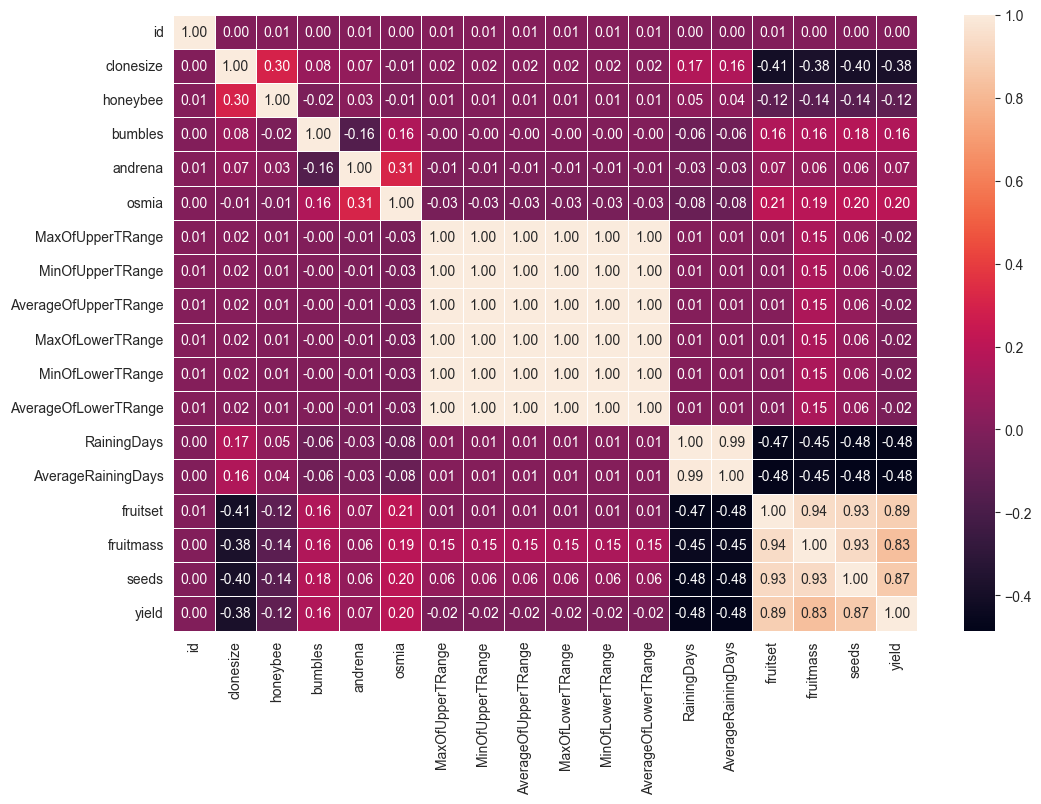

In [7]:
sns.heatmap(df_train.corr(), annot=True, fmt = '.2f', linewidth=.5)

In [8]:
df_train.head()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


In [9]:
df_train.describe()

,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000,15289.000000
mean,7644.000000,19.704690,0.389314,0.286768,0.492675,0.592355,82.169887,49.673281,68.656256,59.229538,28.660553,48.568500,18.660865,0.324176,0.502741,0.446553,36.164950,6025.193999
std,4413.698468,6.595211,0.361643,0.059917,0.148115,0.139489,9.146703,5.546405,7.641807,6.610640,3.195367,5.390545,11.657582,0.163905,0.074390,0.037035,4.031087,1337.056850
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1945.530610
25%,3822.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,16.000000,0.260000,0.458246,0.419216,33.232449,5128.163510
50%,7644.000000,25.000000,0.500000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.506600,0.446570,36.040675,6117.475900
75%,11466.000000,25.000000,0.500000,0.380000,0.630000,0.750000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,24.000000,0.390000,0.560445,0.474134,39.158238,7019.694380
max,15288.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401840


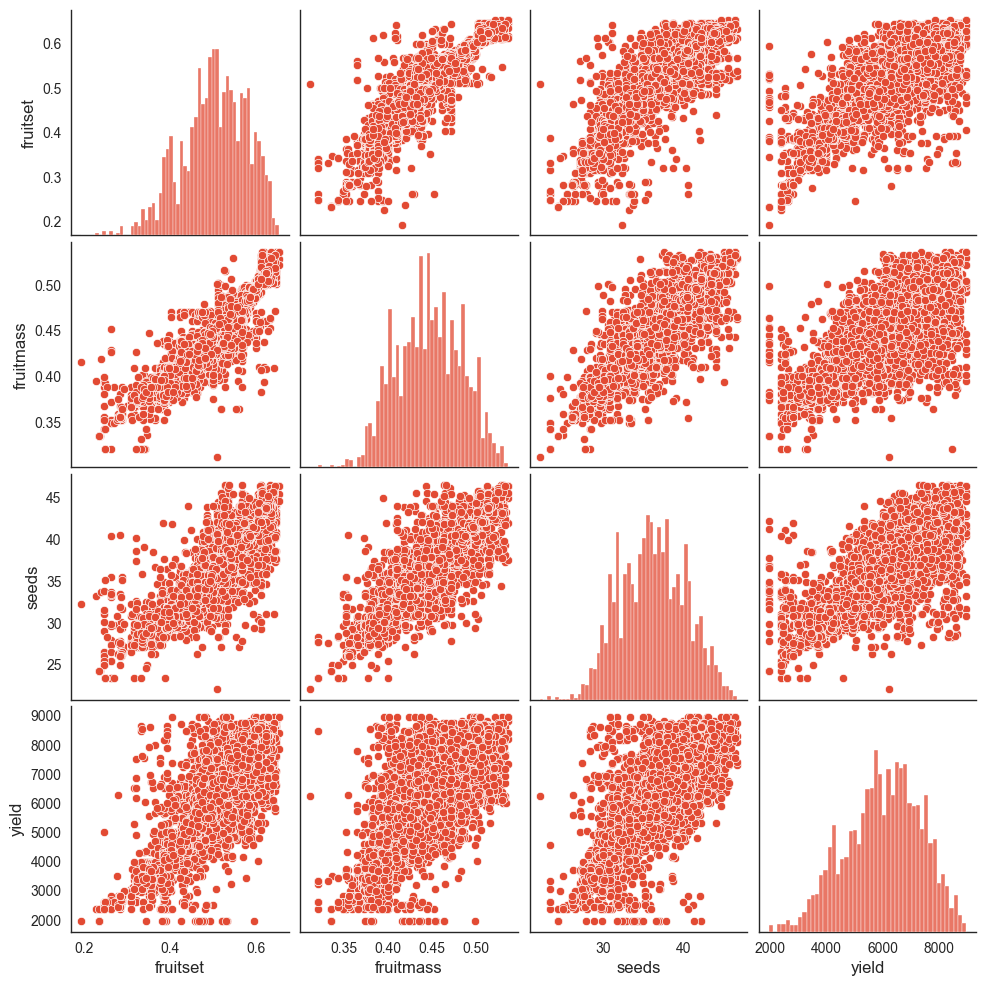

In [10]:
sns.pairplot(df_train, vars = df_train.columns[14:18])

In [11]:
df_train.columns[14:18]

Index(['fruitset', 'fruitmass', 'seeds', 'yield'], dtype='object')

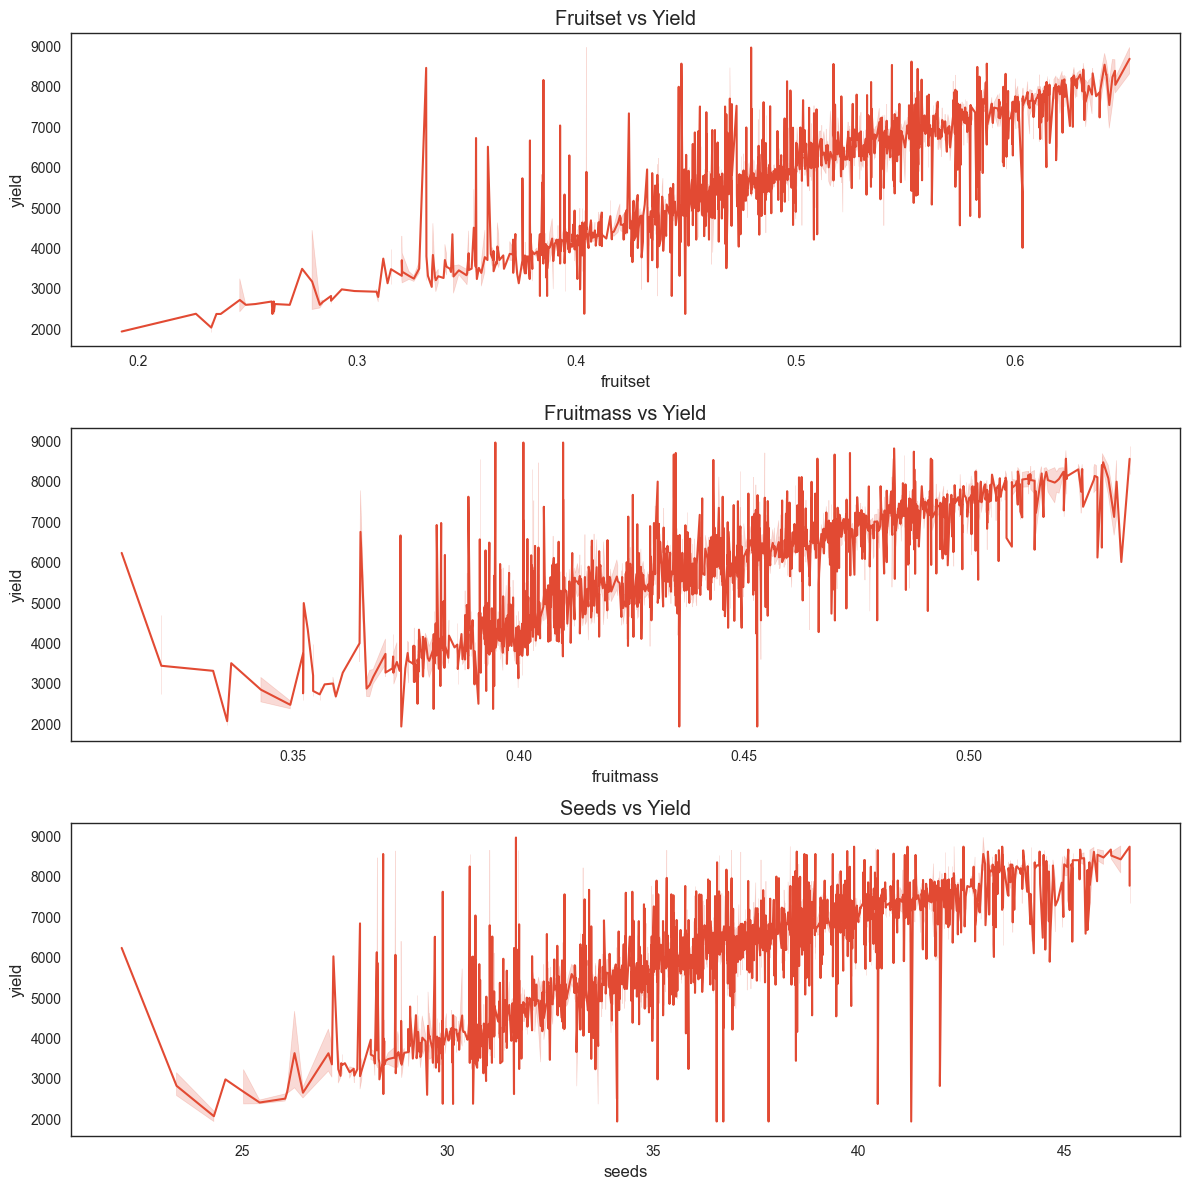

In [12]:
fig = plt.figure(figsize=(12,12))
plt.subplot(3, 1, 1)
sns.lineplot(data=df_train, x='fruitset', y='yield')
plt.title('Fruitset vs Yield')

plt.subplot(3, 1, 2)
sns.lineplot(data=df_train, x='fruitmass', y='yield')
plt.title('Fruitmass vs Yield')


plt.subplot(3, 1, 3)
sns.lineplot(data=df_train, x='seeds', y='yield')
plt.title('Seeds vs Yield')
fig.tight_layout()

In [13]:
# sns.countplot(data=df_train, x='fruitset', hue='yield')

# Splitting Training and Testing Data

In [14]:
df_full = pd.concat([df_train, df_test], axis='columns')
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15289 entries, 0 to 15288
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [15]:
df_full.isna().sum()

id                         0
clonesize                  0
honeybee                   0
bumbles                    0
andrena                    0
osmia                      0
MaxOfUpperTRange           0
MinOfUpperTRange           0
AverageOfUpperTRange       0
MaxOfLowerTRange           0
MinOfLowerTRange           0
AverageOfLowerTRange       0
RainingDays                0
AverageRainingDays         0
fruitset                   0
fruitmass                  0
seeds                      0
yield                      0
id                      5095
clonesize               5095
honeybee                5095
bumbles                 5095
andrena                 5095
osmia                   5095
MaxOfUpperTRange        5095
MinOfUpperTRange        5095
AverageOfUpperTRange    5095
MaxOfLowerTRange        5095
MinOfLowerTRange        5095
AverageOfLowerTRange    5095
RainingDays             5095
AverageRainingDays      5095
fruitset                5095
fruitmass               5095
seeds         

In [16]:
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15289 entries, 0 to 15288
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    15289 non-null  int64  
 1   clonesize             15289 non-null  float64
 2   honeybee              15289 non-null  float64
 3   bumbles               15289 non-null  float64
 4   andrena               15289 non-null  float64
 5   osmia                 15289 non-null  float64
 6   MaxOfUpperTRange      15289 non-null  float64
 7   MinOfUpperTRange      15289 non-null  float64
 8   AverageOfUpperTRange  15289 non-null  float64
 9   MaxOfLowerTRange      15289 non-null  float64
 10  MinOfLowerTRange      15289 non-null  float64
 11  AverageOfLowerTRange  15289 non-null  float64
 12  RainingDays           15289 non-null  float64
 13  AverageRainingDays    15289 non-null  float64
 14  fruitset              15289 non-null  float64
 15  fruitmass          

In [17]:
label = LabelEncoder()
df_train['yield'] = label.fit_transform(df_train['yield'])

In [18]:
X = df_train.drop(['yield'], axis='columns')
y = df_train['yield']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('X_train Shape: {}'.format(X_train.shape))
print('X_test Shape: {}'.format(X_test.shape))
print('y_train Shape: {}'.format(y_train.shape))
print('y_test Shape: {}'.format(y_test.shape))

X_train Shape: (10243, 17)
X_test Shape: (5046, 17)
y_train Shape: (10243,)
y_test Shape: (5046,)


In [21]:
svm = SVC()

In [22]:
svm.fit(X_train, y_train)

SVC()

In [23]:
svm.score(X_train, y_train)

0.0038074782778482865

In [24]:
svm.predict(X_test)

array([335,  90, 284, ..., 415,  90,  35], dtype=int64)